In [1]:
%matplotlib inline
from preprocessing import preprocessing
from module import batch_generator, decoder_gru,  autoencoder_gru, VAE_gru, Predictor
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
X_onehot_train, X_onehot_test, X_long_train, X_long_test, y_train, y_test, demapping = preprocessing()

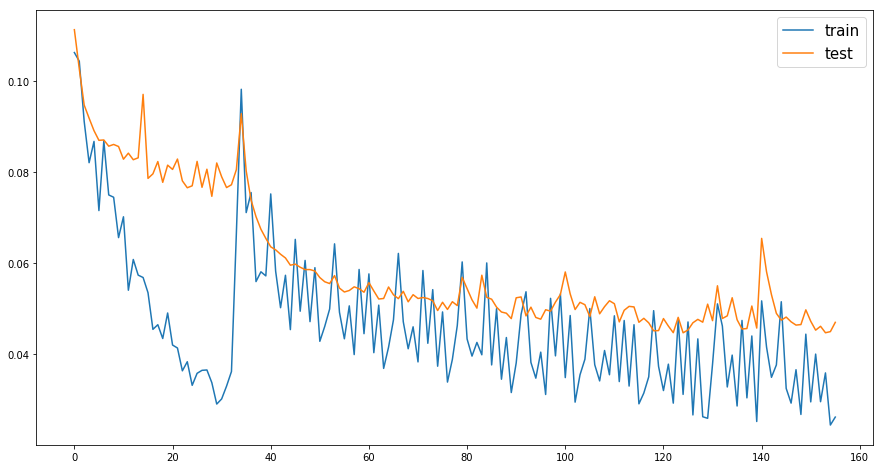

In [2]:
trainloss = [2.12377667427063, 2.0857737064361572, 1.8215900659561157, 1.6407908201217651, 1.7340800762176514, 1.4308974742889404, 1.7367668151855469, 1.4994237422943115, 1.4893076419830322, 1.3123691082000732, 1.4036731719970703, 1.0816348791122437, 1.2164579629898071, 1.147840976715088, 1.137428879737854, 1.0707353353500366, 0.9101413488388062, 0.9304812550544739, 0.8699818253517151, 0.9818592071533203, 0.8413880467414856, 0.828325629234314, 0.7283253073692322, 0.7682358026504517, 0.6647066473960876, 0.7173445820808411, 0.730492889881134, 0.732050895690918, 0.6764549016952515, 0.5825582146644592, 0.6050428152084351, 0.6611530184745789, 0.7252466082572937, 1.3317900896072388, 1.9627315998077393, 1.4220688343048096, 1.5099905729293823, 1.1195355653762817, 1.1624393463134766, 1.1445873975753784, 1.5038702487945557, 1.1651352643966675, 1.005037784576416, 1.1472245454788208, 0.908964991569519, 1.304619312286377, 0.9896509051322937, 1.2123879194259644, 0.9439935088157654, 1.180556058883667, 0.8576886057853699, 0.9230120182037354, 0.999274730682373, 1.2850210666656494, 0.9851426482200623, 0.8687318563461304, 1.0131076574325562, 0.7995428442955017, 1.1726974248886108, 0.8911325335502625, 1.1532716751098633, 0.8078060150146484, 1.0163333415985107, 0.7389676570892334, 0.8317975997924805, 0.9518725872039795, 1.2430909872055054, 0.9433282613754272, 0.8250766396522522, 0.9212393164634705, 0.7673763632774353, 1.1681424379348755, 0.8490273952484131, 1.0842458009719849, 0.7485001087188721, 0.9865030646324158, 0.6789447069168091, 0.7783800363540649, 0.9266459941864014, 1.2057493925094604, 0.8678624629974365, 0.7928481101989746, 0.8527998924255371, 0.7986458539962769, 1.2013212442398071, 0.7542232275009155, 1.000612735748291, 0.6914986371994019, 0.8742786049842834, 0.6330797076225281, 0.7625702023506165, 0.9759928584098816, 1.0749437808990479, 0.7652502655982971, 0.6961243152618408, 0.8101933002471924, 0.6245738863945007, 1.0460551977157593, 0.7938979268074036, 1.065401554107666, 0.6986074447631836, 0.9707354307174683, 0.5910288095474243, 0.7108435034751892, 0.7791141271591187, 1.001401424407959, 0.7549891471862793, 0.6840441823005676, 0.8174397945404053, 0.7110993266105652, 0.9695346355438232, 0.681138813495636, 0.9488984942436218, 0.6614815592765808, 0.9304037094116211, 0.5835784673690796, 0.6308839321136475, 0.7019593119621277, 0.9920664429664612, 0.747833251953125, 0.6417992115020752, 0.757520318031311, 0.5866367816925049, 0.9513648152351379, 0.624970018863678, 0.9425643086433411, 0.5348802804946899, 0.8683251738548279, 0.5270057916641235, 0.5200773477554321, 0.7579059600830078, 1.021978497505188, 0.9246195554733276, 0.657496988773346, 0.7972190976142883, 0.5741117596626282, 0.9491873383522034, 0.6097408533096313, 0.8811308145523071, 0.5061311721801758, 1.0349373817443848, 0.8323332071304321, 0.6997877359390259, 0.754095196723938, 1.0311923027038574, 0.6511248350143433, 0.5867393016815186, 0.7331480383872986, 0.5369991660118103, 0.889038622379303, 0.5920901298522949, 0.8016129732131958, 0.5929180383682251, 0.7191529870033264, 0.490622341632843, 0.5254800319671631]
testloss = [14.344626426696777, 13.236635208129883, 12.211442947387695, 11.842148780822754, 11.488663673400879, 11.215672492980957, 11.226219177246094, 11.050332069396973, 11.099244117736816, 11.040865898132324, 10.682173728942871, 10.852980613708496, 10.66694164276123, 10.721782684326172, 12.5151948928833, 10.139727592468262, 10.268183708190918, 10.615581512451172, 10.027998924255371, 10.513982772827148, 10.393062591552734, 10.686112403869629, 10.06916332244873, 9.874770164489746, 9.929551124572754, 10.619999885559082, 9.887216567993164, 10.398345947265625, 9.63247013092041, 10.575490951538086, 10.185444831848145, 9.880115509033203, 9.959305763244629, 10.387945175170898, 11.970343589782715, 10.350990295410156, 9.523943901062012, 9.057156562805176, 8.701889038085938, 8.44274616241455, 8.203725814819336, 8.119197845458984, 7.9942731857299805, 7.888767719268799, 7.684314250946045, 7.714914798736572, 7.6266350746154785, 7.560592174530029, 7.560697555541992, 7.519474506378174, 7.334704875946045, 7.216400623321533, 7.165532112121582, 7.390523433685303, 7.036787033081055, 6.926637649536133, 6.969059467315674, 7.07276725769043, 7.019279956817627, 6.920199871063232, 7.190710544586182, 6.9555230140686035, 6.7286787033081055, 6.743001461029053, 7.067602157592773, 6.8473005294799805, 6.738912105560303, 6.945809364318848, 6.648869037628174, 6.850093364715576, 6.743623733520508, 6.770220756530762, 6.74303674697876, 6.6784281730651855, 6.402109146118164, 6.636172771453857, 6.433443069458008, 6.651715278625488, 6.541905879974365, 7.339790344238281, 7.02523136138916, 6.704999923706055, 6.470521926879883, 7.400986671447754, 6.776031017303467, 6.722370147705078, 6.498692512512207, 6.360598564147949, 6.326829433441162, 6.174560070037842, 6.76236629486084, 6.787243843078613, 6.250975608825684, 6.497385025024414, 6.20628023147583, 6.1576995849609375, 6.4251861572265625, 6.384747505187988, 6.640571594238281, 6.854384899139404, 7.493101119995117, 6.872990131378174, 6.430845737457275, 6.6344428062438965, 6.566671371459961, 6.231765270233154, 6.791672229766846, 6.310172080993652, 6.512233257293701, 6.678745269775391, 6.595026969909668, 6.08139705657959, 6.409726142883301, 6.520484447479248, 6.504728317260742, 6.070234298706055, 6.182332515716553, 6.054464340209961, 5.8299031257629395, 5.835328578948975, 6.175106048583984, 5.963500022888184, 5.776258945465088, 6.209823131561279, 5.7732038497924805, 5.852538108825684, 6.05651330947876, 6.152698993682861, 6.073136806488037, 6.5827412605285645, 6.116301536560059, 7.102592945098877, 6.1774821281433105, 6.252476215362549, 6.764188289642334, 6.141984939575195, 5.880409240722656, 5.893664836883545, 6.530026435852051, 5.906478404998779, 8.442476272583008, 7.4974565505981445, 6.850823402404785, 6.322539806365967, 6.1297526359558105, 6.217411518096924, 6.083146572113037, 5.990818977355957, 6.005496978759766, 6.422033786773682, 6.099521636962891, 5.847718238830566, 5.956974983215332, 5.774380683898926, 5.805745601654053, 6.068420886993408]
trainloss = [i/20 for i in trainloss]
size = len(y_test)
testloss = [i/size for i in testloss]

plt.figure(figsize=(15, 8))
plt.plot(range(len(trainloss)),trainloss,label="train")
plt.plot(range(len(trainloss)),testloss,label="test")
plt.legend(fontsize=15)

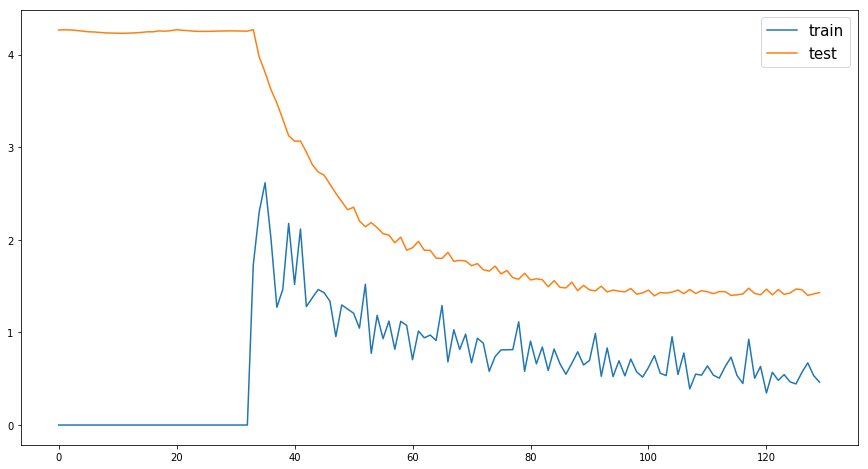

In [3]:
train_loss_y = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7295386805954909, 2.300570178546386, 2.6162578811066055, 2.013289785251062, 1.27150388112119, 1.464477853788853, 2.177267419760029, 1.5179259314001303, 2.116888691435024, 1.279141988241203, 1.3728116865485736, 1.4630099184712382, 1.4304235547265396, 1.3364370766803566, 0.9550873275666963, 1.2967453964617766, 1.2527688509997161, 1.2074847305867467, 1.0463766670764374, 1.5201190664599835, 0.7741474445055815, 1.1839604271044262, 0.9326895231078917, 1.122669183670498, 0.8183267158266513, 1.1201513324837347, 1.076664069817405, 0.7056112451214706, 1.0152123323198783, 0.941899078172915, 0.971499647744535, 0.9127140133900076, 1.2906583945349015, 0.6820260194024936, 1.0287523111094128, 0.81641583894716, 0.9815198522100607, 0.6723674110253456, 0.9373654573244267, 0.8844045015752835, 0.5800829699140805, 0.739455709851712, 0.810912702852044, 0.8119618610131462, 0.8141997733921267, 1.114302855191381, 0.5792964891702058, 0.9067964198140777, 0.6608766161470384, 0.8417372062761037, 0.5893022017353327, 0.820775965592493, 0.6607984350818046, 0.5484018723907, 0.6655194765176933, 0.7904896249601494, 0.6482639393777072, 0.6971360907489613, 0.9888150454192628, 0.5266902312859443, 0.8324775408152962, 0.5230020693640042, 0.6943813256630128, 0.5309710035607206, 0.7124157758289001, 0.5740800838492016, 0.5172864190233577, 0.6213079357152822, 0.7494665396483406, 0.5595898827883624, 0.5336438194355377, 0.9534637584583504, 0.5458186968437213, 0.7775866018747599, 0.39049569800567474, 0.5498957441848042, 0.5385800768927894, 0.6385861520780596, 0.5389679059882132, 0.5061346696126492, 0.630515941309394, 0.73343015169274, 0.5365062628879427, 0.4485887220987033, 0.9267531160064647, 0.5051668382923631, 0.6330272985887849, 0.34604472566464967, 0.5698814461660038, 0.4829025079312246, 0.544556180519369, 0.4664416665622888, 0.44361875745515905, 0.5666922379322471, 0.671557542090649, 0.5347086154142532, 0.4624544366211079]
test_loss_y = [4.26579111311903, 4.2675712299783655, 4.266533431343676, 4.261062056255653, 4.253355506550973, 4.24684761549191, 4.24458665358187, 4.239854372582792, 4.234217744107745, 4.232938031498786, 4.231505774166982, 4.229991341239149, 4.232598252715694, 4.23491271414866, 4.2394484968078485, 4.246379573838865, 4.246381633994382, 4.256153859715165, 4.252750359663773, 4.258558438629005, 4.268772112550768, 4.262396129336279, 4.2584228550290115, 4.252704486759306, 4.250652865434521, 4.250586388772785, 4.251863464383594, 4.254170940526621, 4.25584162922708, 4.256634185400396, 4.255393078982078, 4.253189727081691, 4.2534163867190085, 4.269178479141909, 3.9753299401445665, 3.809090097137669, 3.62109588976768, 3.4780264567205514, 3.302959837924586, 3.124146755464612, 3.0653082752388676, 3.067240924611372, 2.9474777123543414, 2.813094804389133, 2.7327713835517042, 2.6992818069368143, 2.6012588497631812, 2.5017979467915628, 2.4138213177272427, 2.32466121320532, 2.352285149863299, 2.204051480261641, 2.1412242318942667, 2.1853915241939235, 2.1317195194469436, 2.06712320436065, 2.0507845362102515, 1.968029750845496, 2.028623814708179, 1.8874443025926253, 1.9147579787637155, 1.9831762413196605, 1.8873788328298562, 1.8864406855984148, 1.8016033895988048, 1.8001500122455298, 1.8649227942079822, 1.7676138184169676, 1.7781111826164069, 1.7720471608190074, 1.7200214818932342, 1.7434028854038668, 1.6762127042894386, 1.6624916244612293, 1.716150416874075, 1.6317792279639876, 1.6685521909918617, 1.5914892722476615, 1.5748047130271372, 1.6389740388513396, 1.566655957243605, 1.5795353478714325, 1.5690702930338558, 1.4927899396368243, 1.5589899154358657, 1.4868866829509493, 1.4805439021197122, 1.5427335012023589, 1.4509563070361633, 1.5080958715279458, 1.4587102541115287, 1.4492967062855546, 1.4994128493090384, 1.4370555642683986, 1.457826371111956, 1.445166682497381, 1.438184216722043, 1.4754520465523246, 1.4118784843021763, 1.427006036215953, 1.4573009766066582, 1.3948536234667177, 1.4312802293347286, 1.425450350134724, 1.4350276509495572, 1.4577750629002013, 1.419320039269291, 1.4639812817973048, 1.4203202027852253, 1.450799386851054, 1.4395916990174293, 1.4184555539895694, 1.441004181035116, 1.4405087856388377, 1.3999681280400813, 1.4058532757018192, 1.415386488738605, 1.4776296315543567, 1.4210852920359616, 1.4063818725507842, 1.4672045713663167, 1.4059926572923622, 1.4630149282407439, 1.411019282205935, 1.4258113990481385, 1.4686197585582008, 1.4615577280650844, 1.4004591242015851, 1.4157704181484838, 1.429785026819689]

plt.figure(figsize=(15, 8))
plt.plot(range(len(train_loss_y)),train_loss_y,label="train")
plt.plot(range(len(test_loss_y)),test_loss_y,label="test")
plt.legend(fontsize=15)

In [4]:
SAVE_PATH = "data/auto_gru_pred_new"
SAVE_PATH2 = "data/predictor_new"
device = torch.device("cpu")
RNN = autoencoder_gru(23, 14, device)
predictor = Predictor(14)
RNN.load_state_dict(torch.load(SAVE_PATH))
predictor.load_state_dict(torch.load(SAVE_PATH2))

In [5]:
import numpy as np

encoding_train = []
for x_long_each in X_long_train:
    # x_onehot_each = x_onehot_each.reshape(x_onehot_each.size(0), 1, -1)
    encoding_each = RNN.encode(x_long_each)[0][-1].reshape(-1)
    encoding_train.append(encoding_each.detach().numpy())

encoding_test = []
for x_long_each in X_long_test:
    # x_onehot_each = x_onehot_each.reshape(x_onehot_each.size(0), 1, -1)
    encoding_each = RNN.encode(x_long_each)[0][-1].reshape(-1)
    encoding_test.append(encoding_each.detach().numpy())

In [6]:
from sklearn.decomposition import PCA
def pca_2nd(X, whiten=False):
    pca = PCA(n_components=2, whiten=whiten)
    components = pca.fit_transform(X)
    print("variance explained: ", pca.explained_variance_ratio_, "  total:", pca.explained_variance_ratio_.sum())
    return components

In [7]:
encoding_test = np.array(encoding_test)
encoding_train = np.array(encoding_train)

pca_test = pca_2nd(encoding_test)
pca_train = pca_2nd(encoding_train)

variance explained:  [0.34268844 0.20878331]   total: 0.55147177
variance explained:  [0.34310007 0.21774945]   total: 0.56084955


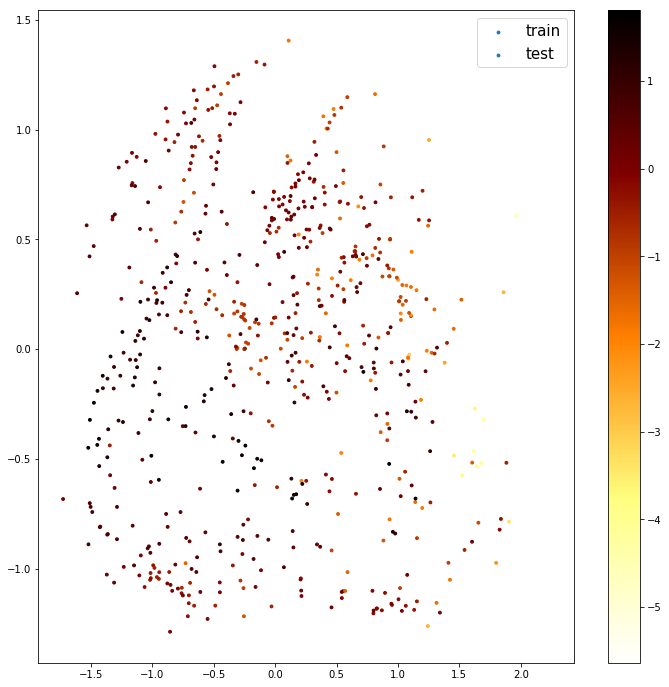

In [18]:
cm = plt.cm.get_cmap('afmhot_r')
plt.figure(figsize=(12, 12))
plt.scatter(pca_train[:,0],pca_train[:,1], s=8, label='train', c=y_train, cmap=cm)
plt.scatter(pca_test[:,0], pca_test[:,1], s=8, label='test', c=y_test, cmap=cm, )
plt.legend(fontsize=15)
plt.colorbar()

In [9]:
def decipher(demapping,prob):
    ''' translate probability to smiles, only for debug
        ::prob:: expect to be [length, feature_logits]
    '''
    if not torch.is_tensor(prob):
        prob = torch.tensor(prob)
    smiles = ''
    prob = prob.view(-1,prob.shape[-1])
    seq = torch.argmax(prob,dim=1)
    for i in seq:
        smiles += demapping[i.item()]
    return smiles

def predict_result(i):
    encoding_each = RNN.encode(X_long_test[i])[0][-1].reshape(-1)
    y_predict = predictor(encoding_each)
    print( decipher(demapping, X_onehot_test[i]))
    print("predict: %.3f   actual: %.3f" % (y_predict, y_test[i]) )
    print(MSE_f(y_predict, y_test[i]).item())
    
def predict_result2(i):
    encoding_each = RNN.encode(X_long_train[i])[0][-1].reshape(-1)
    y_predict = predictor(encoding_each)
    print( decipher(demapping, X_onehot_train[i]))
    print("predict: %.3f   actual: %.3f" % (y_predict, y_train[i]) )
    print(MSE_f(y_predict, y_train[i]).item())

In [10]:
MSE_f = nn.MSELoss()
predict_result2(233)

c1cc(c(cc1l)l)l?
predict: 0.525   actual: 0.699
0.030158016830682755


In [11]:
MSE_f = nn.MSELoss()
loss_Y_log = 0
for (x_onehot_each, x_long_each, y_each) in zip(X_onehot_test, X_long_test, y_test):
    encoding_each = RNN.encode(x_long_each)[0][-1].reshape(-1)
    y_pred = predictor(encoding_each)
    loss_Y_log += MSE_f(y_pred, y_each)

In [12]:
(loss_Y_log/len(y_test))**0.5*3.85

tensor(1.4313, grad_fn=<MulBackward>)

In [13]:
for i in range(10, 20):
    predict_result(i)

c1ccc(c(c1)O)_?
predict: -0.546   actual: -0.623
0.005922992713749409
CCCCCCCCC?
predict: 1.595   actual: 1.805
0.0440644733607769
CCCC(=O)O?
predict: -0.691   actual: -0.662
0.0008541524293832481
Cc1ccnc(c1)C?
predict: -0.053   actual: -0.274
0.04881201684474945
c1cc(cc(c1)O)C_N?
predict: -0.756   actual: -1.520
0.5842682123184204
CCCC[N+](=O)[O-]?
predict: 0.242   actual: 0.187
0.003122477326542139
CCCCCCOC(=O)C?
predict: 0.171   actual: 0.403
0.0534379780292511
COc1cccc(c1)O?
predict: -0.763   actual: -1.003
0.05744672566652298
CCO_(=S)(OCC)S[C@@H](Cl)N1C(=O)c2ccccc2C1=O?
predict: -2.427   actual: -0.503
3.7008793354034424
c1ccc2c(c1)ccc3c2cccc3?
predict: 0.119   actual: -0.019
0.01902599446475506
